# Some simple code to test the environment

In [1]:
import cobyqa

import numpy             as np
import casadi            as ca
import matplotlib.pyplot as plt

from scipy.optimize      import minimize


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

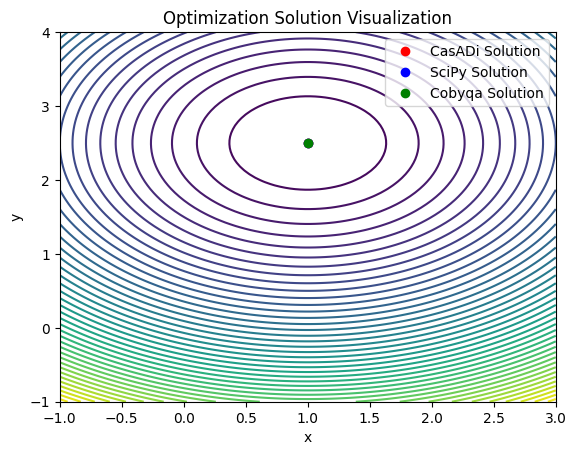

In [2]:
# Test CasADi with a simple optimization problem
x = ca.MX.sym('x', 2)
objective = (x[0] - 1)**2 + (x[1] - 2.5)**2
nlp = {'x': x, 'f': objective}
solver = ca.nlpsol('solver', 'ipopt', nlp)
sol = solver(x0=[0, 0])
print("CasADi Optimization Result:", sol['x'].full())

# Test SciPy with a similar optimization problem
def scipy_objective(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

scipy_result = minimize(scipy_objective, [0, 0])
print("SciPy Optimization Result:", scipy_result.x)

# Test Cobyqa with a sample optimization problem
def cobyqa_objective(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

cobyqa_result = cobyqa.minimize(cobyqa_objective, x0=[0, 0])
print("Cobyqa Optimization Result:", cobyqa_result.x)

# Test NumPy and Matplotlib by plotting a contour plot
x = np.linspace(-1, 3, 100)
y = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x, y)
Z = (X - 1)**2 + (Y - 2.5)**2

plt.contour(X, Y, Z, levels=50, cmap="viridis")
plt.plot(sol['x'][0], sol['x'][1], 'ro', label="CasADi Solution")
plt.plot(scipy_result.x[0], scipy_result.x[1], 'bo', label="SciPy Solution")
plt.plot(cobyqa_result.x[0], cobyqa_result.x[1], 'go', label="Cobyqa Solution")
plt.legend()
plt.title("Optimization Solution Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.show()